We solve the equation:
$$ \frac{\partial \phi}{\partial t} = \kappa \frac{\partial^2 \phi}{\partial x^2}, $$
where $\kappa > 0$ and $\phi(x,t)$ is the tracer concentration.

For this equation, the analytical solution is given by:
$$ \phi(x,t) =  e^{-\lambda^2 \kappa t} A sin( \lambda x), $$

where $\lambda = \frac{2 \pi n x}{L_x}$.

Since we have to impose periodic boundary conditions, we take the full sine curve, and assume $A = 1$, and $n = 1$. 

We have a module named Euler, which contains equations for 1D and 2D advection and diffusion for different types of differencing schemes. Here, we apply the central difference method to the 1D diffusion equation. 

In [1]:
import Euler.Periodic_1D as elr

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sys

# Test 1: Solving 1D diffusion

In [3]:
#Length of domain
Lx = 100

#Number of points in the domain
nx = 25

#Width of each cell
dx = Lx/nx

g = 9.81
rho0 = 1025

#An array of all points
xu_ocean = np.linspace(0,Lx,nx+1,dtype = float)
xu_ocean = xu_ocean[0:-1]

In [4]:
lmda = (2*np.pi)/Lx
phi_old = (np.sin(lmda*xu_ocean))
phi_old_t0 = (np.sin(lmda*xu_ocean))

phi_new = np.zeros(nx)

t_start = 0
t_end = 40
dt = 1

#Set switch - (i) FD = 1, (ii) BD = -1, (iii) CD = 0
#By default, switch is set to 0.
switch_diff_scheme = 0

#actual_sol = 2*(np.sin(2*np.pi*xu_ocean/(Lx)))
kappa = 4.0

for t in np.arange(t_start,t_end,dt):
    phi_new = phi_old + dt*elr.diff_x(kappa,phi_old,dx,nx)
    
    BC = np.exp(-lmda**2 * t * kappa) * np.sin(lmda*xu_ocean)
    
    phi_old = phi_new
    
actual_sol = np.exp(-lmda**2 * t * kappa) * np.sin(lmda*xu_ocean)

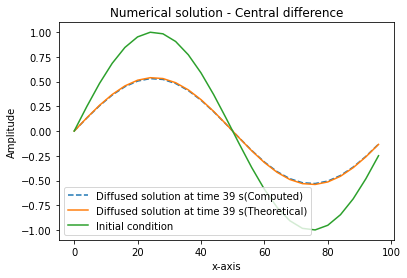

In [5]:
plt.figure()
plt.plot(xu_ocean,phi_new,label = 'Diffused solution at time ' + str(t) + ' s(Computed)',ls = '--')
plt.plot(xu_ocean,BC,label = 'Diffused solution at time ' + str(t) + ' s(Theoretical)')
plt.plot(xu_ocean,phi_old_t0, label = 'Initial condition')
plt.xlabel('x-axis')
plt.ylabel('Amplitude')
plt.legend()
plt.title('Numerical solution - Central difference')
plt.show()

The analytical solution is given by:
$$ \phi(x,t) =  e^{-\lambda^2 \kappa t} sin(\lambda x). $$ 
Here, $\lambda = \frac{2 \pi x}{L_x} = 0.062, \kappa = 4$. Since the sine part of the solution doesn't involve time, we just deal with the exponential part, and in this case, diffusion alters the amplitude of this sine curve without affecting its shape. The amplitude at t = 40 seconds is given by:

$$ e^{-0.0628^2 \times 4 \times 40} = 0.532 $$. 

So, $0.532$ should be the amplitude of our sine wave. As shown below, our analytical and numerical solution match.

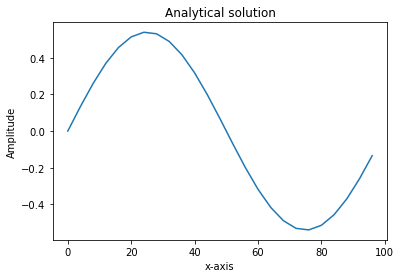

In [6]:
plt.figure()
plt.plot(xu_ocean,actual_sol)
plt.xlabel('x-axis')
plt.ylabel('Amplitude')
plt.title('Analytical solution')
plt.show()

# Test 2: Error analysis

In [13]:
Lx = 10000
nx = [16,32,64,128,256,512,1024,2048,4096,8192,16384]
g = 9.81
rho0 = 1025
kappa = 1.0
error_diff = np.zeros(len(nx))

for i,nxi in enumerate(nx):
    dx = Lx/nxi
    xu_ocean = np.linspace(0,Lx,nxi+1,dtype = float)
    xu_ocean = xu_ocean[0:-1]
    phi_old = (np.sin(lmda*xu_ocean))
    phi_new = np.zeros(nxi)
    
    t_start = 0
    t_end = 40
    dt = 0.001
    
    for t in np.arange(t_start,t_end,dt):
        phi_new = phi_old + dt*elr.diff_x(kappa,phi_old,dx,nxi)

        BC = np.exp(-lmda**2 * t * kappa) * np.sin(lmda*xu_ocean)

        phi_old = phi_new
        
    error_iter = max(abs(BC - phi_new))
    error_diff[i] = error_iter

In [14]:
nx_inv = np.zeros(len(nx))
nx2_inv = np.zeros(len(nx))
for i,nxi in enumerate(nx):
    nx_inv[i] = 1/nxi
    nx2_inv[i] = 1/nxi**2

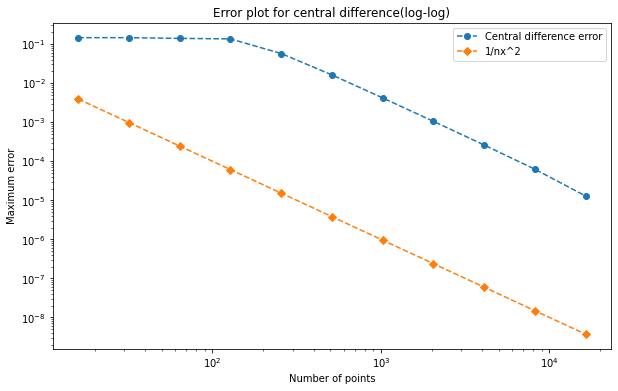

In [16]:
plt.figure(figsize = (10,6))
plt.yscale("log")
plt.xscale("log")
plt.xlabel("Number of points")
plt.ylabel("Maximum error")
plt.plot(nx,error_diff,marker='o',linestyle = '--',label = 'Central difference error')
plt.plot(nx,nx2_inv,marker = 'D',linestyle = '--', label = '1/nx^2')
plt.title("Error plot for central difference(log-log)")
plt.legend()
plt.show()